<a href="https://colab.research.google.com/github/khusheedhanuka/machine_learning/blob/main/Function_for_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

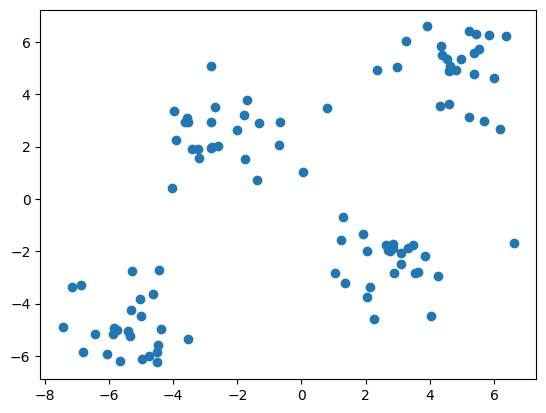

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
centroids = [(-5,-5),(5,5),(-2.5,2.5),(2.5,-2.5)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)

plt.scatter(X[:,0],X[:,1])


In [ ]:
X


array([[-5.3135082 , -4.22898826],
       [ 4.34674973,  5.84245628],
       [-4.49711858, -6.24528809],
       [ 5.69511961,  2.96653345],
       [ 2.86505352, -1.72591797],
       [-5.26905696, -2.76863321],
       [-7.1361961 , -3.35972919],
       [-1.70082   ,  3.76261366],
       [ 2.95967695,  5.04625552],
       [ 2.89652016, -2.81461744],
       [ 3.61788673, -2.77424209],
       [ 6.60869262, -1.67887912],
       [-4.49814279, -5.8442137 ],
       [ 3.11014409, -2.0765031 ],
       [ 1.04663565, -2.83801778],
       [ 4.03176032, -4.48584577],
       [-2.82504963,  1.93976549],
       [ 5.82470301,  6.24821292],
       [ 4.53799465,  5.35088849],
       [ 4.32232442,  3.56056097],
       [ 6.36723542,  6.21788563],
       [ 5.38186623,  5.56627544],
       [ 2.27175244, -4.56961226],
       [-4.44854596, -2.70779199],
       [ 3.46078194, -1.74162965],
       [-5.0191305 , -3.82499878],
       [ 2.03165374, -3.75472031],
       [-6.42121723, -5.1534952 ],
       [ 4.61848352,

In [ ]:
import numpy as np


In [ ]:
import numpy as np

class KMeans:

    def __init__(self, n_clusters, max_iteration):
        self.n_clusters = n_clusters
        self.max_iteration = max_iteration

    def initialize_centroids(self, data):
        centroids = data[np.random.choice(data.shape[0], self.n_clusters, replace=False)]
        return centroids

    def compute_centroids(self, data, labels):
        centroids = np.zeros((self.n_clusters, data.shape[1]))
        for i in range(self.n_clusters):
            centroids[i, :] = np.mean(data[labels == i, :], axis=0)
        return centroids

    def compute_distance(self, data, centroids):
        distances = np.zeros((data.shape[0], self.n_clusters))
        for i in range(self.n_clusters):
            row_norm = np.linalg.norm(data - centroids[i], axis=1)
            distances[:, i] = np.square(row_norm)
        return distances

    def find_closest_cluster(self, distances):
        return np.argmin(distances, axis=1)

    def compute_sse(self, data, centroids, labels):
        distance = np.zeros(data.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = np.linalg.norm(data[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))

    def fit(self, data):
        centroids = self.initialize_centroids(data)
        for i in range(self.max_iteration):
            old_centroids = centroids
            distances = self.compute_distance(data, centroids)
            labels = self.find_closest_cluster(distances)
            centroids = self.compute_centroids(data, labels)
            if np.all(centroids == old_centroids):
                break
        self.centroids = centroids
        self.labels = labels
        self.inertia_ = self.compute_sse(data, centroids, labels)



kmeans = KMeans(n_clusters=4, max_iteration=300)
kmeans.fit(X)
print("Centroids:", kmeans.centroids)
print("Labels:", kmeans.labels)
print("Inertia (SSE):", kmeans.inertia_)


Centroids: [[-5.4127548  -4.86673314]
 [ 4.81711579  5.04740762]
 [ 2.83457728 -2.42188617]
 [-2.38143616  2.48170966]]
Labels: [0 1 0 1 2 0 0 3 1 2 2 2 0 2 2 2 3 1 1 1 1 1 2 0 2 0 2 0 1 3 2 3 0 1 0 0 2
 3 2 3 0 1 3 3 1 3 2 0 2 2 0 1 3 3 3 1 3 1 3 0 3 0 1 3 2 0 3 3 3 1 3 0 0 1
 3 1 1 3 3 1 2 2 2 0 2 1 0 3 1 0 2 1 0 3 2 1 2 0 0 2]
Inertia (SSE): 224.42179166293678


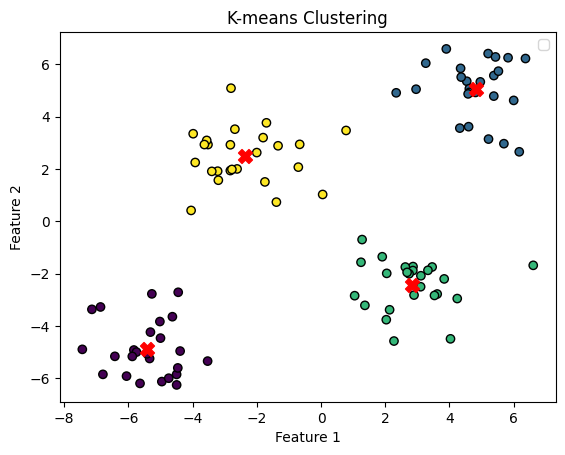

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels, cmap='viridis', marker='o', edgecolors='k')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='X', s=100)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
